<a href="https://colab.research.google.com/github/FGalvao77/Prevendo-valor-de-acoes---Investimentos-WEG-S.A.-WEG3.SA-/blob/main/Prevendo_valor_de_a%C3%A7%C3%B5es_Investimentos_WEG_S_A_(WEG3_SA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prevendo valor de ações - Investimentos `WEG S.A.` (_WEG3.SA_)**
---

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/WEG_Equipamentos_El%C3%A9tricos.svg/1200px-WEG_Equipamentos_El%C3%A9tricos.svg.png' width='500'>

- Website oficial: www.weg.net/br

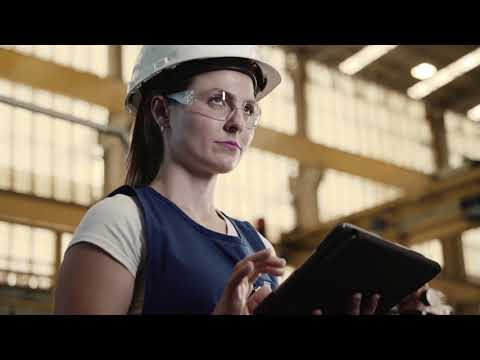

In [1]:
# importando a função para exibicão de vídeo do YouTube no ambiente do google colab / jupyter notebook
from IPython.display import YouTubeVideo

# WEG - Vídeo institucional
YouTubeVideo('u5FGUIasTLM', width=720, height=360)

`WEG S.A` é uma empresa multinacional brasileira com sede na cidade de Jaraguá do Sul, no estado de Santa Catarina.

A empresa é uma das maiores fabricantes de equipamentos elétricos do mundo, atuando nas áreas de comando e proteção, variação de velocidade, automação de processos industriais, geração e distribuição de energia e tintas e vernizes industriais, entre outros produtos.

**História**

A empresa foi fundada em 16 de setembro de 1961 por [Werner Ricardo Voigt](https://pt.wikipedia.org/wiki/Werner_Ricardo_Voigt), [Eggon João da Silva](https://pt.wikipedia.org/wiki/Eggon_Jo%C3%A3o_da_Silva) e [Geraldo Werninghaus](https://pt.wikipedia.org/wiki/Geraldo_Werninghaus) como Eletromotores Jaraguá. Tempos depois a empresa passou a usar razão social WEG S.A. , cujo nome é a junção das iniciais dos três fundadores, **W**erner **E**ggon **G**eraldo.

✅ **SAIBA MAIS!**
- [WEG S.A](https://pt.wikipedia.org/wiki/WEG_S.A.)

Segue o link do arquivo [WEGE3.SA.csv](https://github.com/FGalvao77/Prevendo-valor-de-acoes---Investimentos-WEG-S.A.-WEG3.SA-/blob/main/WEGE3.SA.csv).

> Essa base é bem simplificada!

In [2]:
# função para acessar diretórios/pastas do seu computador para realizar o carregamento do "dataset"
from google.colab import files
data = files.upload()

Saving WEGE3.SA.csv to WEGE3.SA.csv


In [3]:
# visualizando o diretório do google colab e, se o conjunto de dados foi carregado para o ambiente
%ls

sample_data/  WEGE3.SA.csv


In [4]:
# visualizando o conjunto de dados
!head WEGE3.SA.csv

Date,Open,High,Low,Close,Adj Close,Volume
2017-07-24,7.392307,7.473076,7.261538,7.426923,7.051007,2638220
2017-07-25,7.476923,7.476923,7.307692,7.369230,6.996235,2505880
2017-07-26,7.323076,7.442307,7.276923,7.326923,6.956069,2112240
2017-07-27,7.388461,7.419230,7.223076,7.269230,6.901296,1910480
2017-07-28,7.261538,7.296153,7.165384,7.200000,6.835570,2866760
2017-07-31,7.211538,7.303846,7.211538,7.284615,6.915902,2787980
2017-08-01,7.307692,7.480769,7.265384,7.365384,6.992584,4247360
2017-08-02,7.369230,7.569230,7.369230,7.507692,7.127687,5018520
2017-08-03,7.523076,7.561538,7.311538,7.373076,6.999886,3764280


In [5]:
# importando biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

In [9]:
# importando biblioteca para manipulação e análise de dados
import pandas as pd

# configurando exibição de quatro casas decimais
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [10]:
# instanciando o conjunto de dados na variável "data" - (dados em inglês)
data = pd.read_csv('/content/WEGE3.SA.csv')
data.head() # visualizando a 5 primeiras observações do objeto "data"

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-24,7.3923,7.4731,7.2615,7.4269,7.0510,2638220.0000
1,2017-07-25,7.4769,7.4769,7.3077,7.3692,6.9962,2505880.0000
2,2017-07-26,7.3231,7.4423,7.2769,7.3269,6.9561,2112240.0000
3,2017-07-27,7.3885,7.4192,7.2231,7.2692,6.9013,1910480.0000
4,2017-07-28,7.2615,7.2962,7.1654,7.2000,6.8356,2866760.0000


In [11]:
# informações gerais
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       993 non-null    object 
 1   Open       989 non-null    float64
 2   High       989 non-null    float64
 3   Low        989 non-null    float64
 4   Close      989 non-null    float64
 5   Adj Close  989 non-null    float64
 6   Volume     989 non-null    float64
dtypes: float64(6), object(1)
memory usage: 54.4+ KB


Para aumentar nosso desafio, utilizarei todo histórico da série temporal e, portanto irei instalar a biblioteca [`yfinance`](https://pypi.org/project/yfinance/) para realizar a captura dos dados diretamente do site [Yahoo! Finance](https://finance.yahoo.com/).

In [12]:
# instalando a biblioteca 
!pip install yfinance

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 10.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [13]:
# importando a biblioteca para baixar os dados diretamente do site https://finance.yahoo.com/
import yfinance as yf

In [14]:
# importando o conjunto de dados - https://finance.yahoo.com/quote/WEGE3.SA?p=WEGE3.SA&.tsrc=fin-srch
data_WEG = 'WEGE3.SA' # WEG S.A.

In [15]:
# instanciando o conjunto de dados no objeto "df"
df_WEG = yf.download(data_WEG).reset_index()

[*********************100%***********************]  1 of 1 completed


In [16]:
# visualizando o tipo do objeto criado
type(df_WEG)

pandas.core.frame.DataFrame

In [17]:
# visualizando as 5 primeiras observações
df_WEG.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.1686,0.1701,0.1686,0.1686,0.1250,378560
1,2000-01-04,0.1642,0.1642,0.1627,0.1627,0.1207,47320
2,2000-01-05,0.1627,0.1627,0.1627,0.1627,0.1207,0
3,2000-01-06,0.1479,0.1479,0.1479,0.1479,0.1097,250120
4,2000-01-07,0.1494,0.1494,0.1479,0.1479,0.1097,135200


In [18]:
# visualizando as 5 últimas observações
df_WEG.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5614,2022-05-09,26.9000,27.5000,26.6300,26.6600,26.6600,10148000
5615,2022-05-10,26.9600,27.0600,26.0400,26.1200,26.1200,8285600
5616,2022-05-11,26.1200,26.4000,25.9000,26.1000,26.1000,8726100
5617,2022-05-12,26.1100,26.5200,25.8100,26.4100,26.4100,8428100
5618,2022-05-13,26.7300,27.0600,26.4100,26.5000,26.5000,6176600


In [19]:
# dimensão do conjunto de dados
print(f'Dimensão do dataset: \n{df_WEG.shape[0]} linhas e {df_WEG.shape[1]} colunas.')

Dimensão do dataset: 
5619 linhas e 7 colunas.


In [20]:
# visualizando o tipo de dados de cada coluna
df_WEG.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [21]:
# visualizando a data inicial e final
df_WEG['Date'].min(), df_WEG['Date'].max()

(Timestamp('2000-01-03 00:00:00'), Timestamp('2022-05-13 00:00:00'))

In [22]:
# contabilizando valores únicos em cada coluna
df_WEG.nunique()

Date         5619
Open         2436
High         2484
Low          2469
Close        2366
Adj Close    3306
Volume       3530
dtype: int64

In [23]:
# visualizando a presença de valores nulos e/ou faltantes
df_WEG.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [24]:
# criando uma cópia do conjunto de dados para realizarmos a manipulação do mesmo
df_copy = df_WEG.copy()
df_copy.head()  # visualizando as 5 primeiras observações da cópia do conjunto de dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.1686,0.1701,0.1686,0.1686,0.1250,378560
1,2000-01-04,0.1642,0.1642,0.1627,0.1627,0.1207,47320
2,2000-01-05,0.1627,0.1627,0.1627,0.1627,0.1207,0
3,2000-01-06,0.1479,0.1479,0.1479,0.1479,0.1097,250120
4,2000-01-07,0.1494,0.1494,0.1479,0.1479,0.1097,135200


In [25]:
# definindo o índice do conjunto de dados como sendo a coluna "Date"
df_copy.index = df_copy['Date']

# removendo a coluna "Date"
df_copy = df_copy.drop('Date', axis='columns')

In [26]:
# visualizando as colunas presentes no conjunto de dados após sua manipulação
df_copy.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [53]:
# importando bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# configurando ambiente de exibição
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)
# sns.set()
sns.set_style('darkgrid')

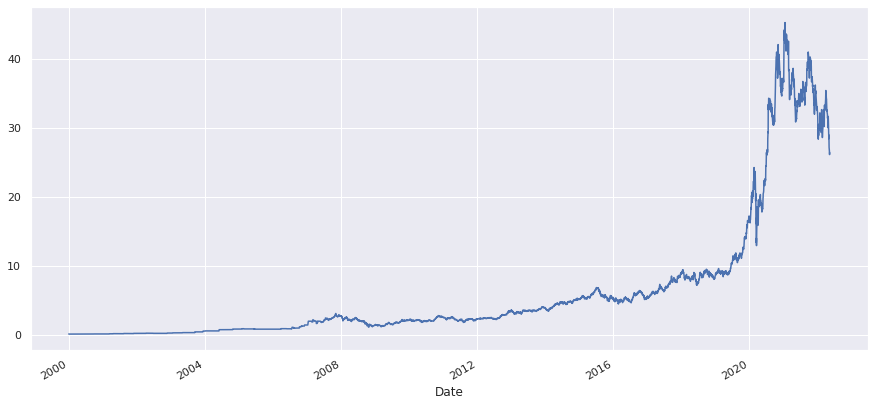

In [54]:
# plotando gráfico do histórico da série temporal em relação ao preço ajustado (Adj Close)
df_copy['Adj Close'].iloc[:-1].plot(figsize=(15,7));

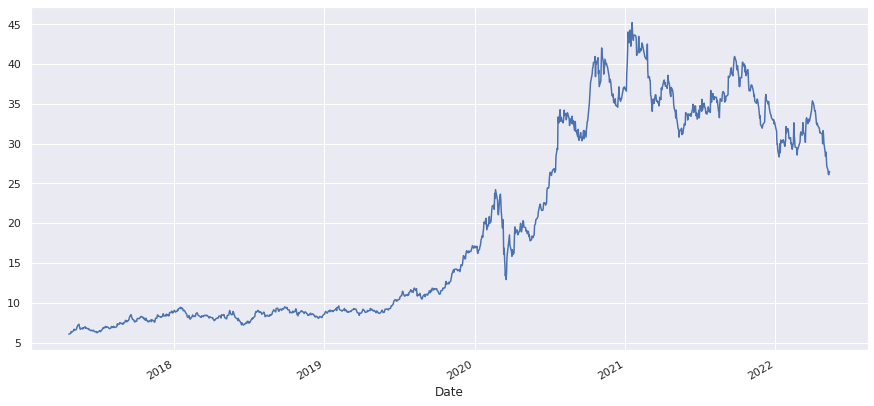

In [55]:
# visualizando o histórico da série temporal do último 5 anos, ou seja, 
# aproximadamente 1.260 dias úteis até a data presente do fechamento do preço ajustado
df_copy['Adj Close'].iloc[-1260:].plot(figsize=(15,7));

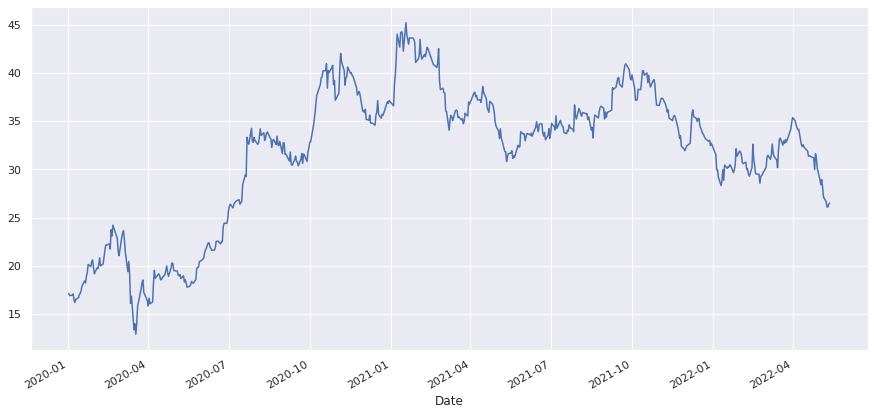

In [56]:
# visualizando o histórico da série temporal do início de 2020 até a data presente do fechamento do preço ajustado
df_copy['Adj Close'].loc['2020-01-01':].plot(figsize=(15,7));

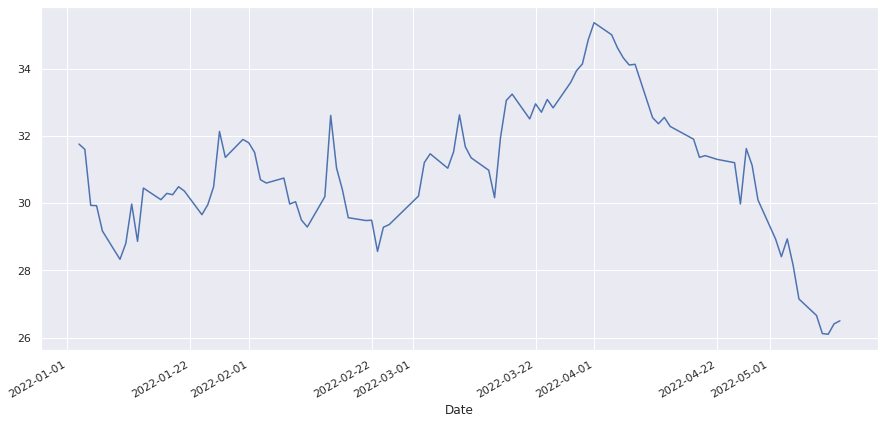

In [57]:
# visualizando o histórico da série temporal do início desse ano (2022) até a data presente do fechamento do preço ajustado
df_copy['Adj Close'].loc['2022-01-01':].plot(figsize=(15,7));

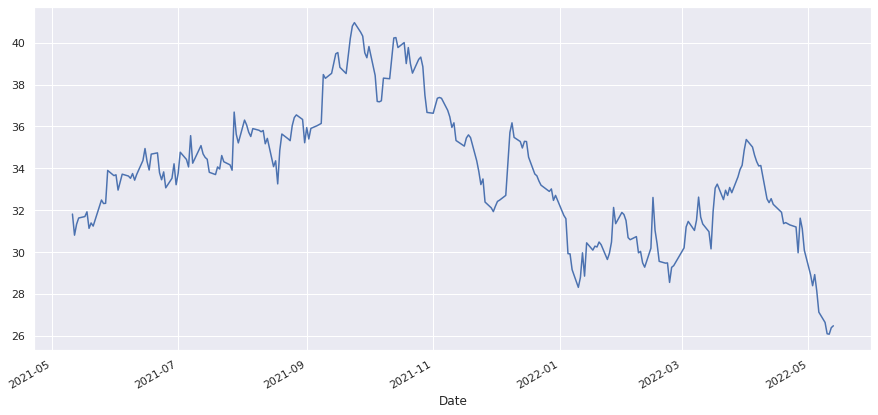

In [58]:
# visualizando o histórico da série temporal de 252 dias úteis (1 ano) até a data presente do fechamento do preço ajustado
df_copy['Adj Close'].iloc[-252:].plot(figsize=(15,7));

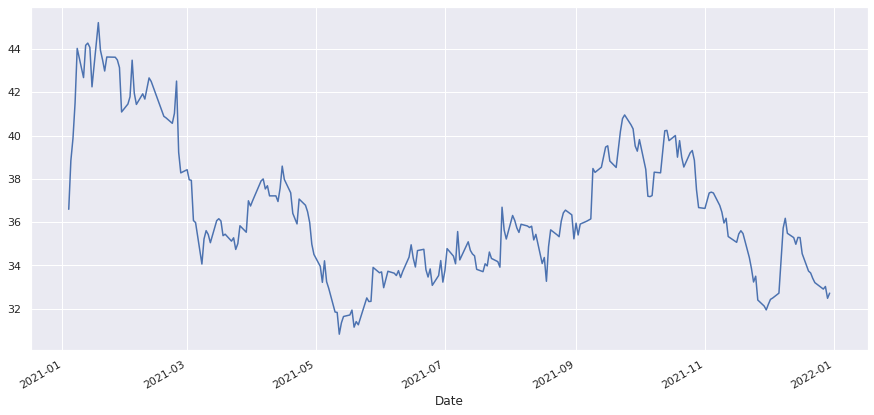

In [59]:
# visualizando o histórico da série temporal somente do ano de 2021
df_copy['Adj Close'].loc['2021-01-01':'2021-12-31'].plot(figsize=(15,7));

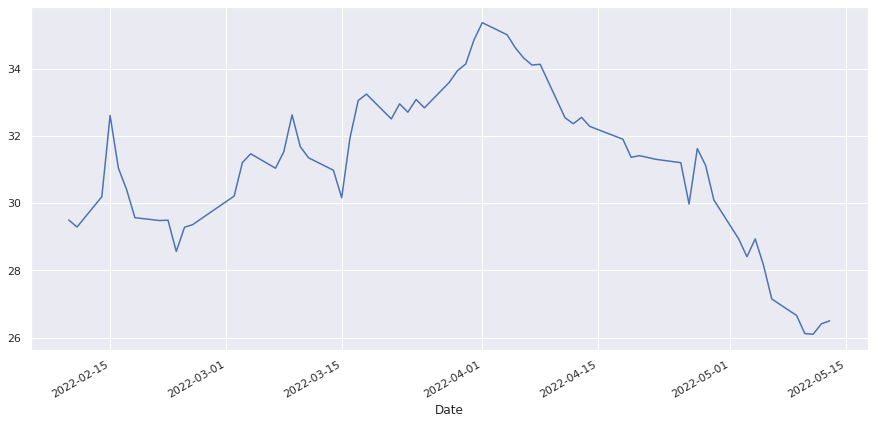

In [60]:
# visualizando o histórico da série temporal dos últimos 63 dias úteis (3 meses) do fechamento do preço ajustado
df_copy['Adj Close'].iloc[-63:].plot(figsize=(15,7));

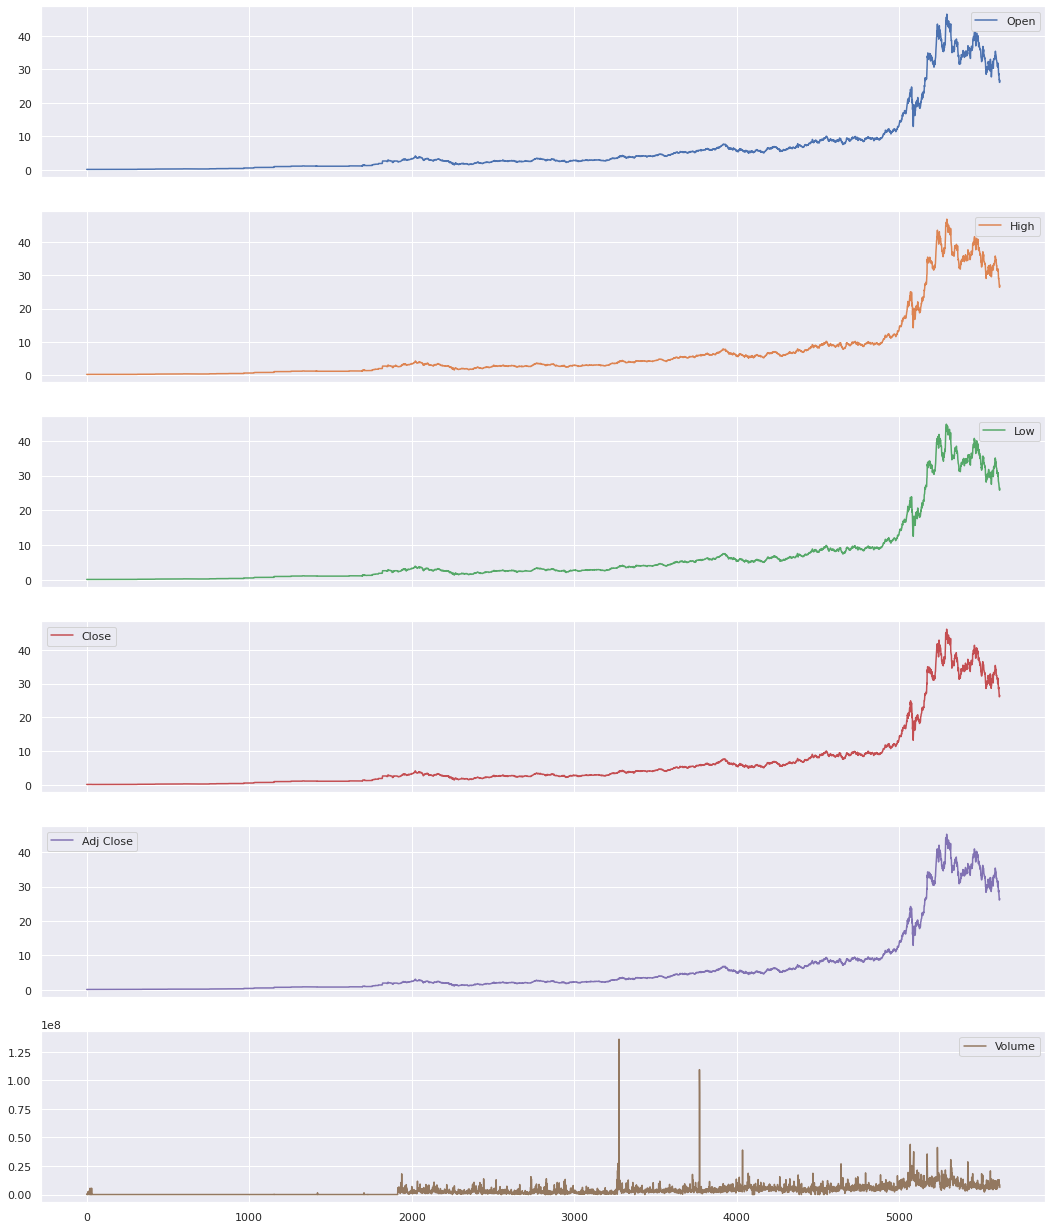

In [61]:
# instanciando as colunas de interesse 
feats = (df_WEG.columns[1:]) # excluindo a primeira coluna, nesse caso a "Date"

# plotando gráfico da série temporal
df_WEG[feats].plot(subplots=True, figsize=(18,22));

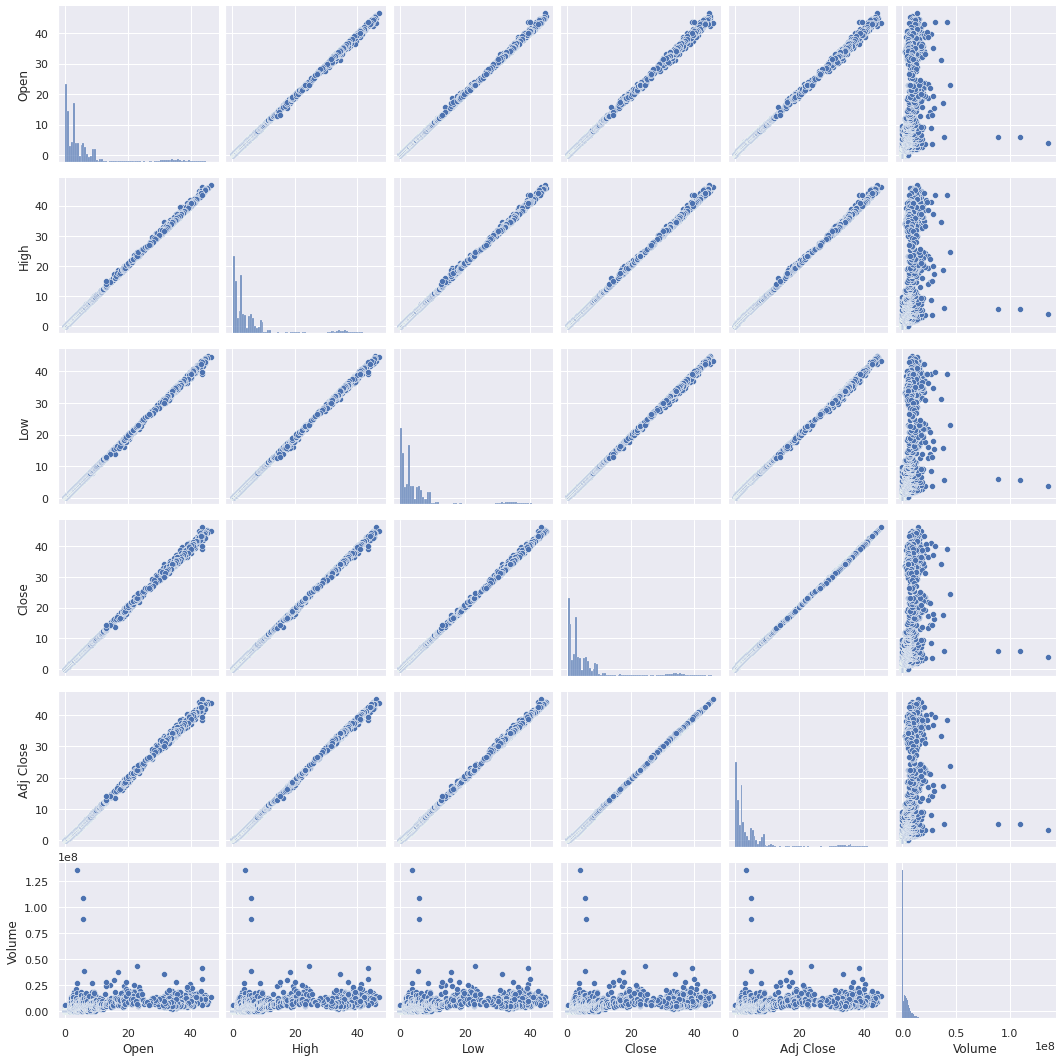

In [64]:
# plotando mural de gráficos
sns.pairplot(df_WEG);

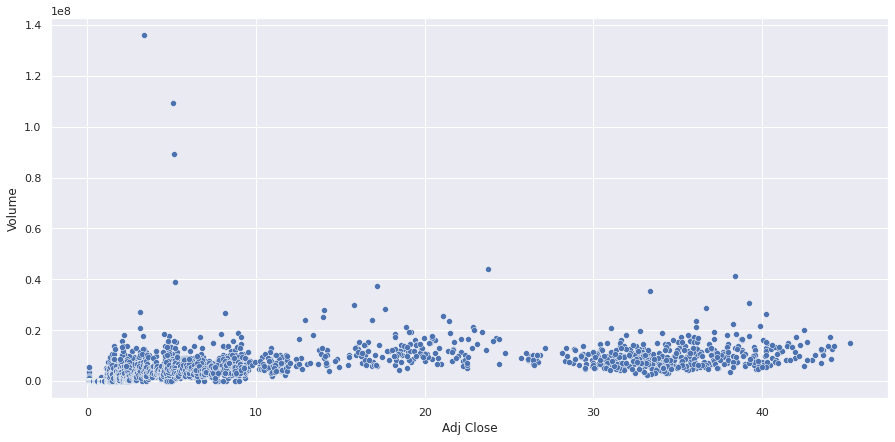

In [65]:
# gráfico de dispersão - "Adj Close" vs "Volume"
# plt.figure=(16, 7)
sns.scatterplot(data=df_WEG, x='Adj Close', y='Volume');

In [66]:
# correlação entre as variáveis
df_WEG.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.0000,0.9999,0.9998,0.9996,0.9994,0.5817
High,0.9999,1.0000,0.9998,0.9998,0.9996,0.5849
Low,0.9998,0.9998,1.0000,0.9998,0.9996,0.5795
Close,0.9996,0.9998,0.9998,1.0000,0.9997,0.5822
Adj Close,0.9994,0.9996,0.9996,0.9997,1.0000,0.5773
Volume,0.5817,0.5849,0.5795,0.5822,0.5773,1.0000


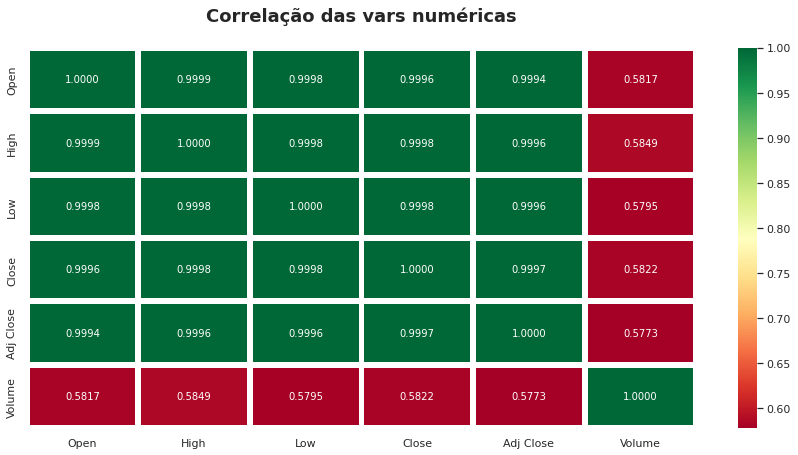

In [67]:
# gráfico de calor da correlação das variáveis numéricas
# plt.figure(figsize=(10,10))
sns.heatmap(df_WEG.corr(), cmap='RdYlGn', annot=True, fmt='.4f', linewidths=5)
plt.title('Correlação das vars numéricas\n', 
          {'fontsize': 18, 'fontweight': 'bold'});

In [68]:
# realizando um ponto de corte da correlação entre as variáveis somente maior e/ou igual a 0.5
vars_num_corr = df_WEG.corr()['Adj Close'][:-1]
important_feats = vars_num_corr[abs(vars_num_corr) >= 0.5].sort_values(ascending=False)

print(f'Há {len(important_feats)} atributos com forte correlação com a variável alvo (Adj Close). \nSegue:')
important_feats

Há 5 atributos com forte correlação com a variável alvo (Adj Close). 
Segue:


Adj Close   1.0000
Close       0.9997
High        0.9996
Low         0.9996
Open        0.9994
Name: Adj Close, dtype: float64

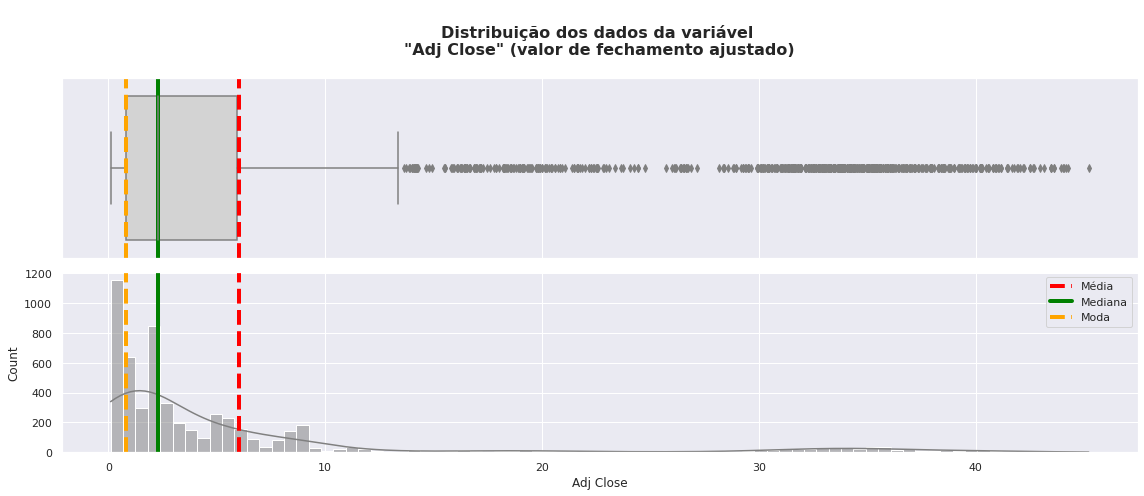

In [69]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Adj Close" (valor de fechamento ajustado)
mean = df_WEG['Adj Close'].mean()
median = df_WEG['Adj Close'].median()
mode = df_WEG['Adj Close'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(16,7))

sns.boxplot(data=df_WEG, x='Adj Close', ax=ax_box, color='lightgray')
ax_box.axvline(mean, color='red', linestyle='--', linewidth=4)
ax_box.axvline(median, color='green', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável \n"Adj Close" (valor de fechamento ajustado)\n',
                 {'fontsize': 16,'fontweight': 'bold'})

sns.histplot(data=df_WEG, x='Adj Close', ax=ax_hist, kde=True, color='gray')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

In [70]:
# instanciando os atributos "Date" e "Adj Close" na variável "df_close"
df_close_date = df_WEG[['Date', 'Adj Close']]

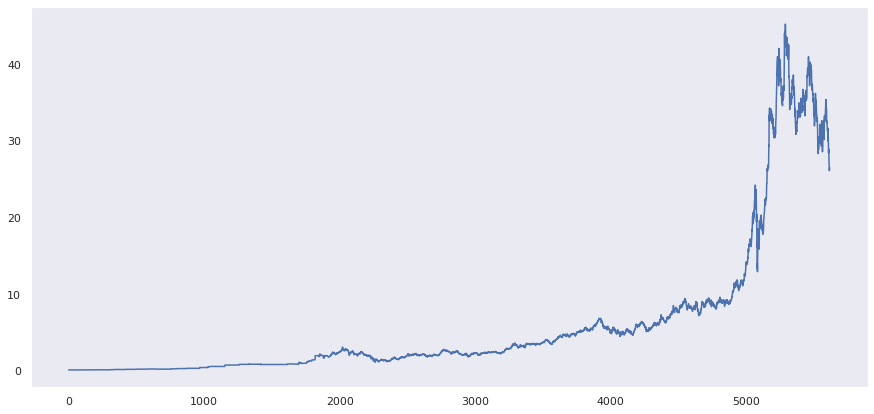

In [71]:
# gráfico de linha da série temporal
df_close_date['Adj Close'].plot(secondary_y=data_WEG, figsize=(15,7));

In [72]:
# criando novos atributos para "Adj Close" (fechamento ajustado)
df_WEG['5-day moving average'] = df_WEG['Adj Close'].rolling(5).mean()      # média móvel de 5 dias (uma semana)
df_WEG['10-day moving average'] = df_WEG['Adj Close'].rolling(10).mean()    # média móvel de 10 dias (duas semanas)
df_WEG['15-day moving average'] = df_WEG['Adj Close'].rolling(15).mean()    # média móvel de 15 dias (três semanas)
df_WEG['22-day moving average'] = df_WEG['Adj Close'].rolling(22).mean()    # média móvel de 22 dias (um mês) 
df_WEG['33-day moving average'] = df_WEG['Adj Close'].rolling(33).mean()    # média móvel de 33 dias (um mês e meio)
df_WEG['44-day moving average'] = df_WEG['Adj Close'].rolling(44).mean()    # média móvel de 44 dias (dois meses)
df_WEG['66-day moving average'] = df_WEG['Adj Close'].rolling(66).mean()    # média móvel de 66 dias (três meses)
df_WEG['88-day moving average'] = df_WEG['Adj Close'].rolling(88).mean()    # média móvel de 88 dias (quatro meses)

In [73]:
# visualizando os 20 últimos atributos
df_WEG[['5-day moving average', '10-day moving average', 
        '15-day moving average', '22-day moving average', 
        '33-day moving average', '44-day moving average', 
        '66-day moving average', '88-day moving average']].tail(20)

,5-day moving average,10-day moving average,15-day moving average,22-day moving average,33-day moving average,44-day moving average,66-day moving average,88-day moving average
5599,32.7820,33.7390,33.7869,33.4703,32.6674,31.9886,31.4857,31.8939
5600,32.3360,33.3920,33.7247,33.4687,32.7444,32.0433,31.5327,31.8506
5601,32.1000,33.0270,33.5760,33.3918,32.7794,32.0905,31.5538,31.7960
5602,31.9100,32.7060,33.4073,33.3085,32.7856,32.1183,31.5925,31.7499
5603,31.6600,32.4040,33.2180,33.2538,32.7806,32.0886,31.6054,31.7047
5604,31.4440,32.1130,32.9740,33.1741,32.7856,32.0923,31.6221,31.6619
5605,31.0580,31.6970,32.6140,33.0498,32.7385,32.0826,31.6173,31.6015
5606,31.1100,31.6050,32.3880,32.9833,32.7081,32.1294,31.6382,31.5600
5607,31.0520,31.4810,32.1547,32.9055,32.6913,32.1667,31.6478,31.5213
5608,30.8100,31.2350,31.8727,32.7464,32.6533,32.1804,31.6438,31.4799


In [74]:
# contabilizando valores nulos presente na base de dados
df_WEG.isnull().sum()

Date                      0
Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
5-day moving average      4
10-day moving average     9
15-day moving average    14
22-day moving average    21
33-day moving average    32
44-day moving average    43
66-day moving average    65
88-day moving average    87
dtype: int64

In [75]:
# ajustando o valor de fechamento para o dia posterior
df_WEG['Adj Close'] = df_WEG['Adj Close'].shift(-1)

In [76]:
# visualizando a base da dados
df_WEG

,Date,Open,High,Low,Close,Adj Close,Volume,5-day moving average,10-day moving average,15-day moving average,22-day moving average,33-day moving average,44-day moving average,66-day moving average,88-day moving average
0,2000-01-03,0.1686,0.1701,0.1686,0.1686,0.1207,378560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,0.1642,0.1642,0.1627,0.1627,0.1207,47320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,0.1627,0.1627,0.1627,0.1627,0.1097,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,0.1479,0.1479,0.1479,0.1479,0.1097,250120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,0.1494,0.1494,0.1479,0.1479,0.1097,135200,0.1171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,2022-05-09,26.9000,27.5000,26.6300,26.6600,26.1200,10148000,27.8640,29.1100,29.8880,30.9400,31.9361,31.9107,31.3822,31.1345
5615,2022-05-10,26.9600,27.0600,26.0400,26.1200,26.1000,8285600,27.4060,28.7240,29.5020,30.5668,31.7288,31.7988,31.2961,31.0595
5616,2022-05-11,26.1200,26.4000,25.9000,26.1000,26.4100,8726100,26.8380,28.1710,29.1507,30.2023,31.5284,31.6752,31.2140,30.9952
5617,2022-05-12,26.1100,26.5200,25.8100,26.4100,26.5000,8428100,26.4880,27.6990,28.8167,29.8509,31.3259,31.5338,31.1490,30.9361


In [77]:
# percentual de dados nulos/ausentes em relação ao total de dados da base
((df_WEG.isnull().sum() / len(df_WEG)) * 100).round(2)

Date                    0.0000
Open                    0.0000
High                    0.0000
Low                     0.0000
Close                   0.0000
Adj Close               0.0200
Volume                  0.0000
5-day moving average    0.0700
10-day moving average   0.1600
15-day moving average   0.2500
22-day moving average   0.3700
33-day moving average   0.5700
44-day moving average   0.7700
66-day moving average   1.1600
88-day moving average   1.5500
dtype: float64

In [78]:
# removendo valores nulos/ausentes da base de dados
df_WEG.dropna(inplace=True)

# verificando se valores nulos/ausentes foram removidos
df_WEG.isnull().sum().any()    # retorno é uma resposta boleana | True = verdadeiro & False = falso

False

In [85]:
# instanciando os atributos "Date", "Adj Close", "5-day moving average", "10-day moving average", 
# "15-day moving average", "22-day moving average", "33-day moving average", "44-day moving average",
# "66-day moving average" e "88-day moving average" na variável "df_close2"
df_close2 = df_WEG[['Date', 'Adj Close', '5-day moving average', '10-day moving average', 
                    '15-day moving average', '22-day moving average', '33-day moving average', 
                    '44-day moving average', '66-day moving average', '88-day moving average']]

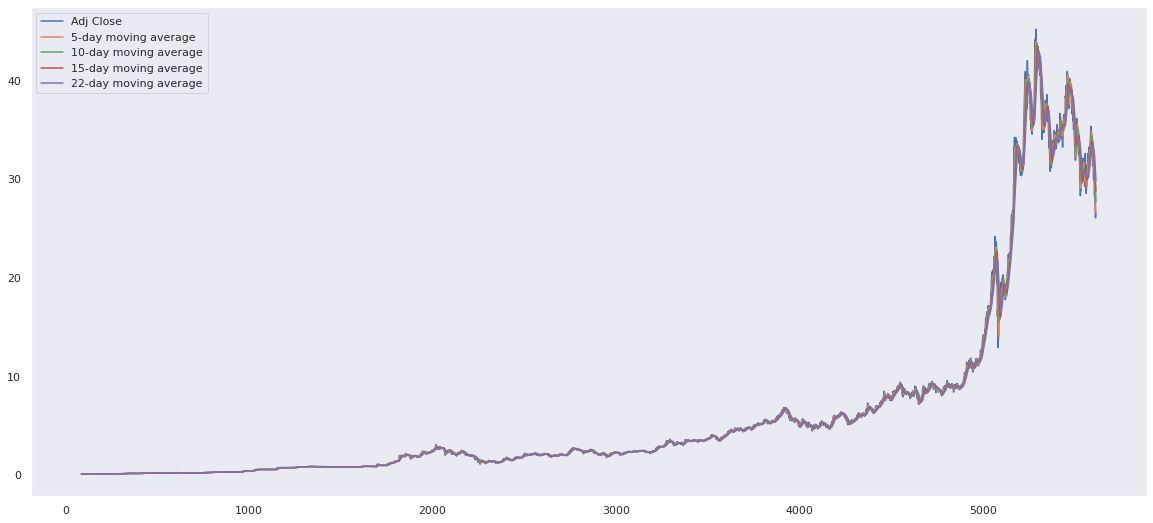

In [86]:
# gráfico de linha da série temporal:
# "Adj Close", "5-day moving average", "10-day moving average", "15-day moving average" e "22-day moving average"valor ajustado
df_close2[['Adj Close', '5-day moving average', 
          '10-day moving average', '15-day moving average', 
           '22-day moving average']].plot(secondary_y=data_WEG, figsize=(20,9));

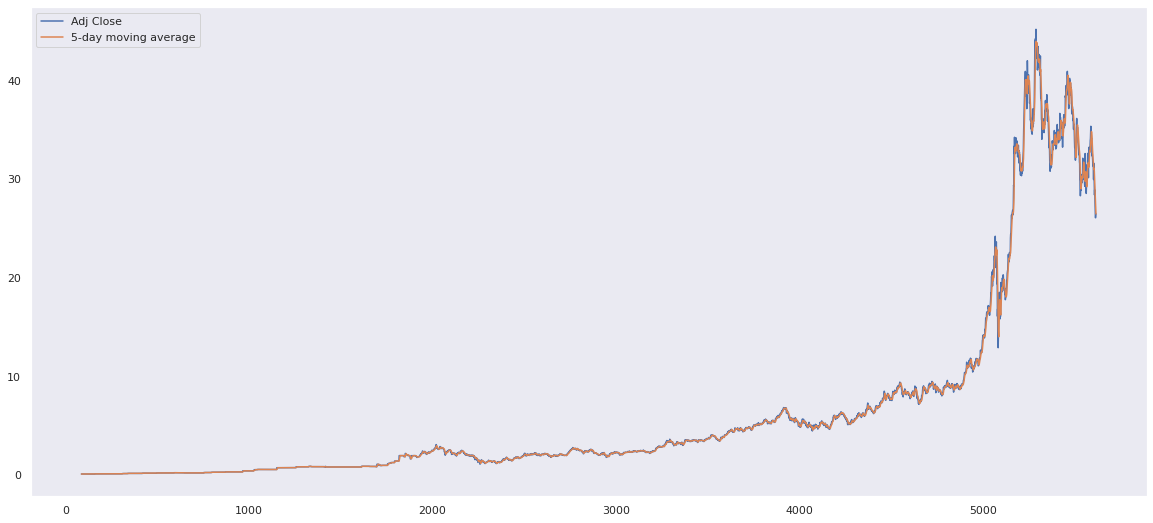

In [87]:
# gráfico de linha da série temporal:
# "Adj Close" e "5-day moving average"
df_close2[['Adj Close', '5-day moving average']].plot(secondary_y=data_WEG, figsize=(20,9));

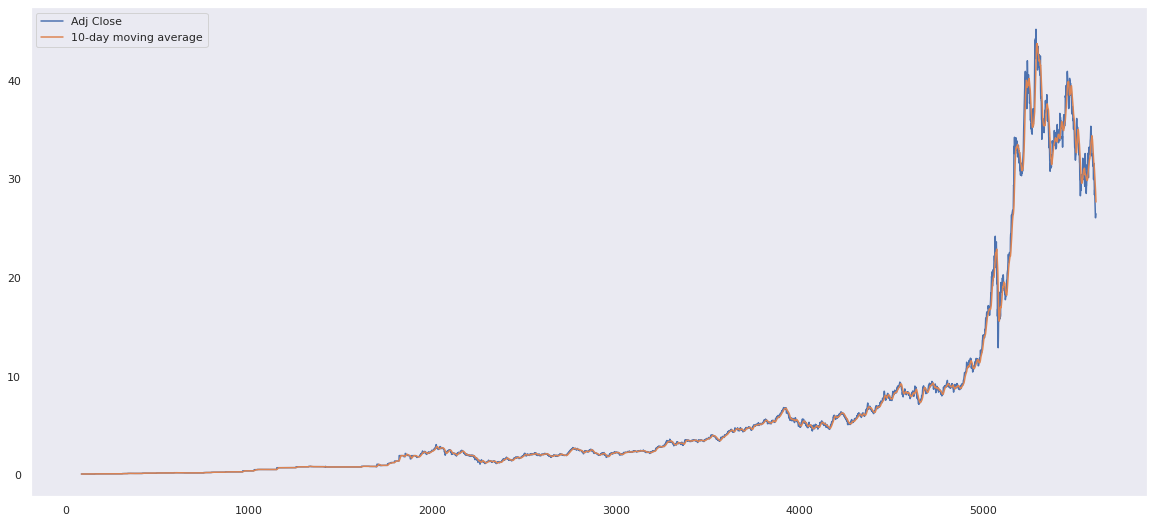

In [88]:
# gráfico de linha da série temporal:
# "Adj Close" e "10-day moving average"
df_close2[['Adj Close', '10-day moving average']].plot(secondary_y=data_WEG, figsize=(20,9));

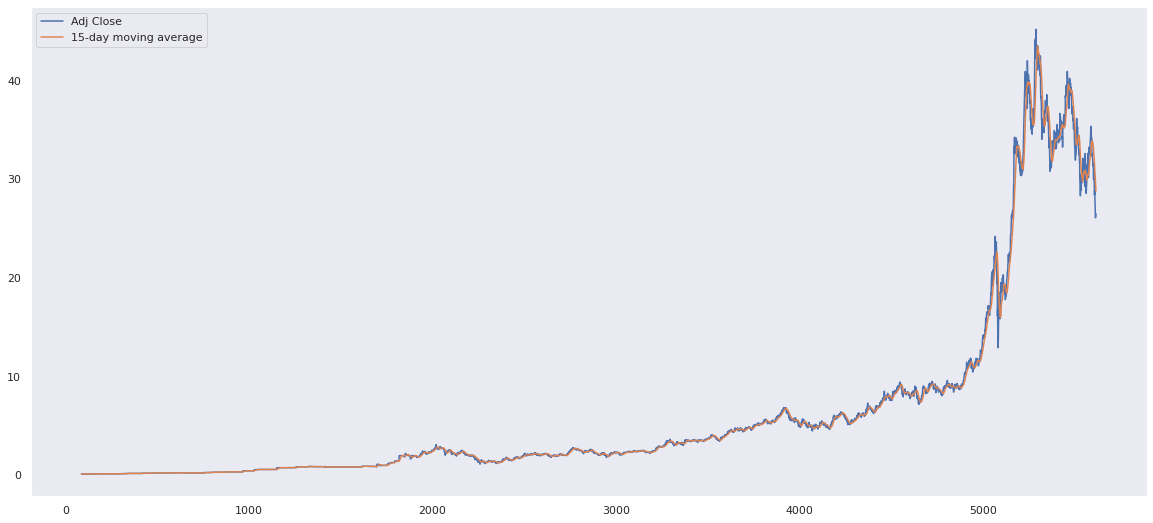

In [89]:
# gráfico de linha da série temporal:
# "Adj Close" e "15-day moving average"
df_close2[['Adj Close', '15-day moving average']].plot(secondary_y=data_WEG, figsize=(20,9));

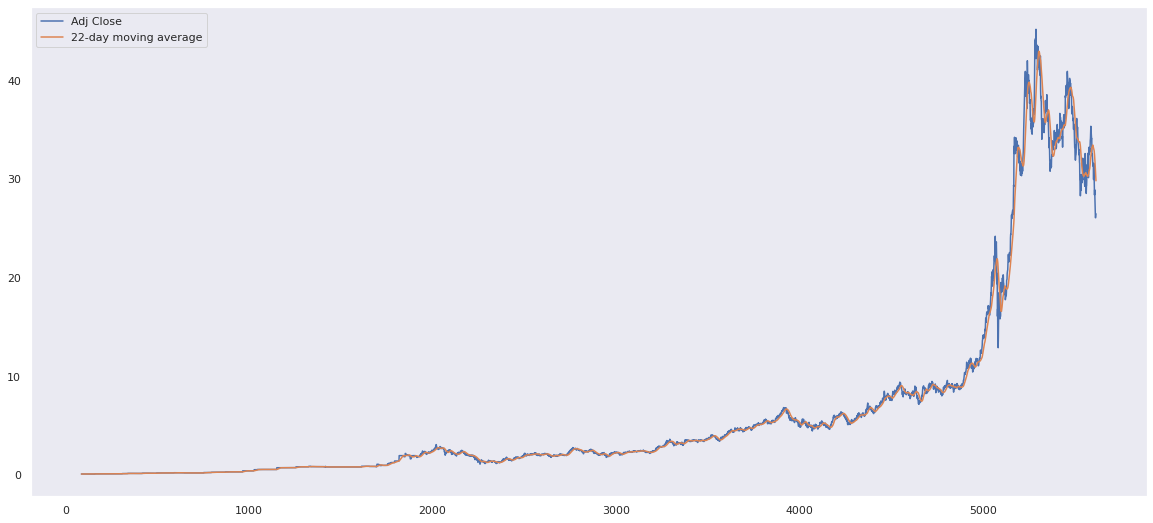

In [90]:
# gráfico de linha da série temporal:
# "Adj Close" e "22-day moving average"
df_close2[['Adj Close', '22-day moving average']].plot(secondary_y=data_WEG, figsize=(20,9));

Vamos utilizar a biblioteca [plotly](https://plotly.com/) para tornar nossos gráficos mais interativos e mais interpretativos.

In [91]:
import plotly.express as px
# import plotly.figure_factory as ff

In [92]:
# função para realizar o "plot" do gráfico interativo
def interactive_plot(df, title):
    fig = px.line(title=title)

    for i in df.columns[1:]:
        fig.add_scatter(x=df['Date'], y=df[i], name=i)
    fig.show()

In [93]:
# aplicando a função no objeto "df_close2"
interactive_plot(df_close2, 'Stock Prices - Adj Close')

In [94]:
# dimensão da base de dados
df_WEG.shape   # linhas e colunas

(5531, 15)

In [95]:
# separando a quantidade linhas de treino, validaçao e teste
linhas_df = df_WEG.shape[0]

linhas_treino = round(linhas_df * 0.7)
linhas_validacao = round(linhas_df * 0.2)
linhas_teste = round(linhas_df * 0.1) - 1

print(
    '[INFO]:\n'
    f'- Linhas da base de dados: {linhas_df}',
    f'- Linhas de treino (70%) = {linhas_treino} | Índices = 0:{linhas_treino}', 
    f'- Linhas de validação (20%) =  {linhas_validacao} | Índices = {linhas_treino}:{linhas_treino + linhas_validacao}',
    f'- Linhas de teste (10%) = {linhas_teste} | Índices = {linhas_treino + linhas_validacao}:{linhas_df}',
    sep='\n'
)

[INFO]:
- Linhas da base de dados: 5531
- Linhas de treino (70%) = 3872 | Índices = 0:3872
- Linhas de validação (20%) =  1106 | Índices = 3872:4978
- Linhas de teste (10%) = 552 | Índices = 4978:5531


In [96]:
# visualizando a quantidade de observações em cada particionamento
linhas_treino, linhas_validacao, linhas_teste

(3872, 1106, 552)

In [97]:
# instanciando a quantidade dos dados de treino, validação e teste
train_data = linhas_treino  # 3872
val_data = linhas_validacao # 1106
test_data = linhas_teste    # 552

print(
    f'Qtde de dados de treino: {train_data}', 
    f'Qtde de dados de validação: {val_data}', 
    f'Qtde de dados de treino: {test_data}',
    sep='\n')

print('Total geral:', train_data + val_data + test_data)

Qtde de dados de treino: 3872
Qtde de dados de validação: 1106
Qtde de dados de treino: 552
Total geral: 5530


In [98]:
# reindexando o índice da base de dados
df_WEG = df_WEG.reset_index(drop=True)
df_WEG

,Date,Open,High,Low,Close,Adj Close,Volume,5-day moving average,10-day moving average,15-day moving average,22-day moving average,33-day moving average,44-day moving average,66-day moving average,88-day moving average
0,2000-05-03,0.1479,0.1479,0.1479,0.1479,0.1097,0,0.1097,0.1097,0.1097,0.1097,0.1097,0.1097,0.1115,0.1127
1,2000-05-04,0.1479,0.1479,0.1479,0.1479,0.1097,0,0.1097,0.1097,0.1097,0.1097,0.1097,0.1097,0.1113,0.1126
2,2000-05-05,0.1479,0.1479,0.1479,0.1479,0.1042,0,0.1097,0.1097,0.1097,0.1097,0.1097,0.1097,0.1111,0.1124
3,2000-05-08,0.1405,0.1405,0.1405,0.1405,0.1042,27040,0.1086,0.1091,0.1093,0.1094,0.1095,0.1096,0.1108,0.1123
4,2000-05-09,0.1405,0.1405,0.1405,0.1405,0.1042,0,0.1075,0.1086,0.1090,0.1092,0.1094,0.1094,0.1105,0.1122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5526,2022-05-06,28.0900,28.0900,26.9300,27.1500,26.6600,13021900,28.3200,29.5650,30.2633,31.3023,32.1135,32.0201,31.4616,31.2006
5527,2022-05-09,26.9000,27.5000,26.6300,26.6600,26.1200,10148000,27.8640,29.1100,29.8880,30.9400,31.9361,31.9107,31.3822,31.1345
5528,2022-05-10,26.9600,27.0600,26.0400,26.1200,26.1000,8285600,27.4060,28.7240,29.5020,30.5668,31.7288,31.7988,31.2961,31.0595
5529,2022-05-11,26.1200,26.4000,25.9000,26.1000,26.4100,8726100,26.8380,28.1710,29.1507,30.2023,31.5284,31.6752,31.2140,30.9952


In [99]:
# instanciando as variáveis explicativas (X) e a variável resposta (y)
X = df_WEG.drop(['Date', 'Adj Close'], axis=1)
y = df_WEG['Adj Close']

# tamanho das variáveis
len(X), len(y)

(5531, 5531)

In [100]:
# biblioteca para recursos matemáticos
import numpy as np

# visualizando os 5 primeiros dados da variável X e y
print(
    f'\t\t++++++ [INFO] 5 amostras +++++\n'
    '\t\t==============================',
    f'Variáveis explicativas (X): \n{X.head()}', 
    f'Variável resposta (y): \n{np.array(y[:5])}',
    sep='\n\n' 
)

		++++++ [INFO] 5 amostras +++++

Variáveis explicativas (X): 
    Open   High    Low  Close  Volume  5-day moving average  \
0 0.1479 0.1479 0.1479 0.1479       0                0.1097   
1 0.1479 0.1479 0.1479 0.1479       0                0.1097   
2 0.1479 0.1479 0.1479 0.1479       0                0.1097   
3 0.1405 0.1405 0.1405 0.1405   27040                0.1086   
4 0.1405 0.1405 0.1405 0.1405       0                0.1075   

   10-day moving average  15-day moving average  22-day moving average  \
0                 0.1097                 0.1097                 0.1097   
1                 0.1097                 0.1097                 0.1097   
2                 0.1097                 0.1097                 0.1097   
3                 0.1091                 0.1093                 0.1094   
4                 0.1086                 0.1090                 0.1092   

   33-day moving average  44-day moving average  66-day moving average  \
0                 0.1097               

In [101]:
# função para escolher os melhores atributos
from sklearn.feature_selection import SelectKBest

# instanciando o objeto
k_best_feats = SelectKBest(k='all')

In [102]:
# criando uma lista com os atributos da variável explicativas
feats_list = list(X.columns)
print(feats_list)

['Open', 'High', 'Low', 'Close', 'Volume', '5-day moving average', '10-day moving average', '15-day moving average', '22-day moving average', '33-day moving average', '44-day moving average', '66-day moving average', '88-day moving average']


In [103]:
# treinando e transformando com o objeto os dados da variável explicativa
k_best_feats.fit_transform(X, y)

# instanciando as melhores métricas
k_best_feats_scores = k_best_feats.scores_

In [104]:
# concatenando os atributos e seus respectivos valores (peso de importância)
raw_pairs = zip(feats_list[1:], k_best_feats_scores)

# ordenando a lista de maior para o menor valores (peso de importância)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

In [105]:
# instanciando a lista com os pesos da importância dos atributos em um dicionário
k_best_feats_final = dict(ordered_pairs[:15])
best_feats = k_best_feats_final.keys()

# imprimindo os resultados
print(
    'Melhores atributos (features):\n'
    f'{k_best_feats_final}'
)

Melhores atributos (features):
{'Volume': 23813.13099816419, '10-day moving average': 20055.902943776637, 'Low': 16688.360697109038, 'Close': 16310.944856453014, 'High': 14205.366283653488, '15-day moving average': 12399.400383600732, '88-day moving average': 10549.206027647106, '22-day moving average': 9309.20495902947, '66-day moving average': 8355.588604271881, '33-day moving average': 7603.202299187668, '44-day moving average': 7312.020504627619, '5-day moving average': 14.322094690672374}


In [106]:
# nome das colunas
df_WEG.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       '5-day moving average', '10-day moving average',
       '15-day moving average', '22-day moving average',
       '33-day moving average', '44-day moving average',
       '66-day moving average', '88-day moving average'],
      dtype='object')

In [107]:
# atributos com maior grau de importância
best_feats

dict_keys(['Volume', '10-day moving average', 'Low', 'Close', 'High', '15-day moving average', '88-day moving average', '22-day moving average', '66-day moving average', '33-day moving average', '44-day moving average', '5-day moving average'])

In [108]:
# visualizando as "features" mais importante e suas respectivas pontuações
list(k_best_feats_final.keys()), list(k_best_feats_final.values())

(['Volume',
  '10-day moving average',
  'Low',
  'Close',
  'High',
  '15-day moving average',
  '88-day moving average',
  '22-day moving average',
  '66-day moving average',
  '33-day moving average',
  '44-day moving average',
  '5-day moving average'],
 [23813.13099816419,
  20055.902943776637,
  16688.360697109038,
  16310.944856453014,
  14205.366283653488,
  12399.400383600732,
  10549.206027647106,
  9309.20495902947,
  8355.588604271881,
  7603.202299187668,
  7312.020504627619,
  14.322094690672374])

In [109]:
feats_selection = list(k_best_feats_final.keys())[-1:]
feats_selection

['5-day moving average']

In [110]:
# instanciando os atributos com maior importância e para isso iremos eliminar algumas "features"
feats_importance = df_WEG.drop(['Date', 'Open', 'Adj Close', 
                                 '5-day moving average'], axis=1)

# feats_importance = df_WEG.drop(feats_selection, axis=1)


# visualizando os atributos selecionados
feats_importance

,High,Low,Close,Volume,10-day moving average,15-day moving average,22-day moving average,33-day moving average,44-day moving average,66-day moving average,88-day moving average
0,0.1479,0.1479,0.1479,0,0.1097,0.1097,0.1097,0.1097,0.1097,0.1115,0.1127
1,0.1479,0.1479,0.1479,0,0.1097,0.1097,0.1097,0.1097,0.1097,0.1113,0.1126
2,0.1479,0.1479,0.1479,0,0.1097,0.1097,0.1097,0.1097,0.1097,0.1111,0.1124
3,0.1405,0.1405,0.1405,27040,0.1091,0.1093,0.1094,0.1095,0.1096,0.1108,0.1123
4,0.1405,0.1405,0.1405,0,0.1086,0.1090,0.1092,0.1094,0.1094,0.1105,0.1122
...,...,...,...,...,...,...,...,...,...,...,...
5526,28.0900,26.9300,27.1500,13021900,29.5650,30.2633,31.3023,32.1135,32.0201,31.4616,31.2006
5527,27.5000,26.6300,26.6600,10148000,29.1100,29.8880,30.9400,31.9361,31.9107,31.3822,31.1345
5528,27.0600,26.0400,26.1200,8285600,28.7240,29.5020,30.5668,31.7288,31.7988,31.2961,31.0595
5529,26.4000,25.9000,26.1000,8726100,28.1710,29.1507,30.2023,31.5284,31.6752,31.2140,30.9952


In [155]:
# normalizando os dados de entradas da seleção dos atributos acima

# biblioteca para normalização dos dados
from sklearn.preprocessing import MinMaxScaler

# instanciando o objeto e realizando o treinamento da normalização dos dados da variável "feats_importance"
scaler = MinMaxScaler()
feats_scaled = scaler.fit_transform(feats_importance)

print(
    f'Dados normalizados: {feats_scaled.shape[0]} linhas e {feats_scaled.shape[1]} colunas.',
    feats_scaled,
    sep='\n\n'
)

Dados normalizados: 5531 linhas e 11 colunas.

[[1.58069709e-04 1.65608730e-04 1.60906849e-04 ... 1.33221168e-04
  1.83976598e-04 1.90507433e-04]
 [1.58069709e-04 1.65608730e-04 1.60906849e-04 ... 1.33221168e-04
  1.78935814e-04 1.86098698e-04]
 [1.58069709e-04 1.65608730e-04 1.60906849e-04 ... 1.33221168e-04
  1.73895030e-04 1.82949717e-04]
 ...
 [5.75331767e-01 5.79932331e-01 5.65207653e-01 ... 7.69947489e-01
  7.88385185e-01 7.82021647e-01]
 [5.61226032e-01 5.76797468e-01 5.64772525e-01 ... 7.66946950e-01
  7.86311064e-01 7.80395574e-01]
 [5.63790729e-01 5.74782214e-01 5.71516853e-01 ... 7.63510926e-01
  7.84667176e-01 7.78904065e-01]]


In [156]:
# quantidade de dados da variável "feats_scaled"
len(feats_scaled)

5531

In [157]:
# # instanciando os dados de treino e validação 
# X_train = feats_scaled[0:3842]
# X_val = feats_scaled[3842:4940]

# y_train = y[0:3842]
# y_val = y[3842:4940]

# print(
#     '\tDados',
#     '\n++++++++++++++++++++'
#     '\n             X | y'
#     '\nTreino   :', len(X_train), len(y_train), 
#     '\nValidação:', len(X_val), len(y_val)
# )

In [158]:
# instanciando os dados de treino e validação 
X_train = feats_scaled[0:linhas_treino]
X_val = feats_scaled[linhas_treino:(linhas_treino + linhas_validacao)]

y_train = y[0:linhas_treino]
y_val = y[linhas_treino:(linhas_treino + linhas_validacao)]

print(
    '\tDados',
    '\n++++++++++++++++++++'
    '\n             X | y'
    '\nTreino   :', len(X_train), len(y_train), 
    '\nValidação:', len(X_val), len(y_val)
)

	Dados 
++++++++++++++++++++
             X | y
Treino   : 3872 3872 
Validação: 1106 1106


In [159]:
print(
    '5 amostras dos dados de treino',
    f'X: \n{X_train[:5]}',
    f'y: \n{y_train[:5]}',
    sep='\n\n'
)

5 amostras dos dados de treino

X: 
[[0.00015807 0.00016561 0.00016091 0.         0.00012561 0.00012638
  0.00012787 0.00012944 0.00013322 0.00018398 0.00019051]
 [0.00015807 0.00016561 0.00016091 0.         0.00012561 0.00012638
  0.00012787 0.00012944 0.00013322 0.00017894 0.0001861 ]
 [0.00015807 0.00016561 0.00016091 0.         0.00012561 0.00012638
  0.00012787 0.00012944 0.00013322 0.0001739  0.00018295]
 [0.         0.         0.         0.00019879 0.00011305 0.00011795
  0.00012206 0.00012552 0.00013019 0.00016675 0.00017823]
 [0.         0.         0.         0.         0.00010049 0.00010953
  0.00011625 0.0001216  0.00012717 0.00015961 0.00017665]]

y: 
0   0.1097
1   0.1097
2   0.1042
3   0.1042
4   0.1042
Name: Adj Close, dtype: float64


In [160]:
print(
    '5 amostras dos dados de validação',
    f'X: \n{X_val[:5]}',
    f'y: \n{y_val[:5]}',
    sep='\n\n'
)

5 amostras dos dados de validação

X: 
[[0.13673866 0.13482038 0.1335866  0.02272169 0.12780254 0.12981583
  0.13452168 0.14118512 0.14940117 0.15667629 0.15380382]
 [0.13345061 0.13507873 0.13149468 0.03360372 0.12774741 0.12906574
  0.1337491  0.1402964  0.1486736  0.15645694 0.1537433 ]
 [0.13246419 0.13378691 0.13082527 0.047028   0.12760565 0.12828395
  0.13283803 0.13934882 0.14797431 0.15623229 0.15369252]
 [0.13024476 0.13387302 0.13115997 0.03670986 0.12712525 0.12797229
  0.1319379  0.1384821  0.14731664 0.15598545 0.15364275]
 [0.13221759 0.13576772 0.13442336 0.04076601 0.12688111 0.12774516
  0.13139855 0.13787045 0.14671978 0.15577558 0.15360795]]

y: 
3872   5.5289
3873   5.5014
3874   5.5152
3875   5.6492
3876   5.6733
Name: Adj Close, dtype: float64


In [161]:
# função de regressão linear
from sklearn.linear_model import LinearRegression

# instanciando o modelo
l_reg = LinearRegression()

# realizando o treinamento e a predição com o modelo instanciado
l_reg.fit(X_train, y_train)
pred = l_reg.predict(X_val)

# função de avaliação do modelo
from sklearn.metrics import r2_score

# aplicando a função nos dados de avaliação (y_val) e nas predições (pred)
eval_model = r2_score(y_val, pred)

# visualizando o resultado
print(
    'Modelo de Regressão Linear',
    f'\nCoeficiente de determinação: {eval_model * 100:.2f}%'
)

Modelo de Regressão Linear 
Coeficiente de determinação: 98.91%


In [164]:
# função de rede neural
from sklearn.neural_network import MLPRegressor

# instanciando o modelo
mlp_reg = MLPRegressor(max_iter=500, learning_rate='adaptive', alpha=0.0009, random_state=42)

# realizando o treinamento e a predição com o modelo instanciado
mlp_reg.fit(X_train, y_train)
pred = mlp_reg.predict(X_val)

# função de avaliação do modelo
from sklearn.metrics import r2_score

# aplicando a função nos dados de avaliação (y_val) e nas predições (pred)
eval_model = r2_score(y_val, pred)

# visualizando o resultado
print(
    'Modelo de Rede Neural Simples',
    f'\nCoeficiente de determinação: {eval_model * 100:.2f}%'
)

Modelo de Rede Neural Simples 
Coeficiente de determinação: 88.03%


In [165]:
# instanciando um dicionário com hiperparâmetros
params = {
    'hidden_layer_sizes': [(i, ) for i in list(range(1, 21))],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'], 
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

# visualizando os dados do dicionário instanciado
params

{'activation': ['tanh', 'relu'],
 'alpha': [0.0001, 0.05],
 'hidden_layer_sizes': [(1,),
  (2,),
  (3,),
  (4,),
  (5,),
  (6,),
  (7,),
  (8,),
  (9,),
  (10,),
  (11,),
  (12,),
  (13,),
  (14,),
  (15,),
  (16,),
  (17,),
  (18,),
  (19,),
  (20,)],
 'learning_rate': ['constant', 'adaptive'],
 'solver': ['lbfgs', 'sgd', 'adam']}

In [166]:
# função de rede neural
from sklearn.neural_network import MLPRegressor

# instanciando o modelo com 500 iterações
# mlp_reg = MLPRegressor(max_iter=500, learning_rate='adaptive', alpha=0.0009)
mlp_reg = MLPRegressor(max_iter=500, random_state=42)

# função de procura dos melhores hiperparâmetros
from sklearn.model_selection import GridSearchCV

# instanciando o objeto "search" e aplicando a função "GridSearchCV" com os seguintes argumentos:
# modelo instanciado, dicionário de parâmetros, número de núcleos , validação cruzada
search = GridSearchCV(mlp_reg, params, n_jobs=-1, cv=5)

# visualizando o objeto com seus parâmetros
search

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (6,), (7,), (8,), (9,), (10,),
                                                (11,), (12,), (13,), (14,),
                                                (15,), (16,), (17,), (18,),
                                                (19,), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [167]:
# realizando o treinamento do objeto "search" com os dados de treino (X_train, y_train)
search.fit(X_train, y_train)

# instanciando os melhores parâmetros
clf = search.best_estimator_
print(clf)  # visualizando o resultado dos melhores parâmetros

# realizando a predição com os dados de validação (X_val)
pred = search.predict(X_val)

# realizando avaliação do modelo com os dados de validação (X_val, y_val)
eval_model = search.score(X_val, y_val)

# visualizando o resultado
print(
    '\nModelo de Rede Neural Complexa',
    f'\nCoeficiente de determinação: {eval_model * 100:.2f}%'
)

MLPRegressor(alpha=0.05, hidden_layer_sizes=(7,), max_iter=500, random_state=42,
             solver='lbfgs')

Modelo de Rede Neural Complexa 
Coeficiente de determinação: 98.89%


In [168]:
# contabilizando a quantidade de observações por objetos
len(feats_scaled), linhas_treino, linhas_validacao, linhas_teste

(5531, 3872, 1106, 552)

In [169]:
# total de dados de treino e validação
linhas_treino + linhas_validacao

4978

In [170]:
# total de dados para teste
len(feats_scaled) - (linhas_treino + linhas_validacao)

553

In [208]:
# utilizando o modelo que apresentou melhor coeficiente de determinação nos dados de teste
# previsao = feats_scaled[4973:5526]
previsao = feats_scaled[(linhas_treino + linhas_validacao):len(feats_scaled)]

data_pregao_full = df_WEG['Date']
# data_pregao = data_pregao_full[4973:5526]
data_pregao = data_pregao_full[(linhas_treino + linhas_validacao):len(feats_scaled)]

resp_full = df_WEG['Adj Close']
# resp = resp_full[4973:5526]
resp = resp_full[(linhas_treino + linhas_validacao):len(feats_scaled)]

# função de regressão linear
# from sklearn.linear_model import LinearRegression

# instanciando o modelo
model = LinearRegression()
# model = MLPRegressor(hidden_layer_sizes=(10,), learning_rate='adaptive', 
#                      max_iter=500, solver='lbfgs')

model.fit(X_train, y_train)

print(
    '\tScore',
    f'Dados de treino: {model.score(X_train, y_train):.4f}',
    f'Dados de validação: {model.score(X_val, y_val):.4f}\n',
    sep='\n'
    )

pred_final = model.predict(previsao)

import pandas as pd

df = pd.DataFrame({
    'Date': data_pregao,
    'real': resp,
    'previsao': pred_final
})

df['real'] = df['real'].shift(+1)

df.set_index('Date', inplace=True)
df.round(4)

	Score
Dados de treino: 0.9984
Dados de validação: 0.9891



,real,previsao
Date,,
2020-02-17,NaN,20.9982
2020-02-18,21.7445,21.1323
2020-02-19,23.7486,22.2022
2020-02-20,23.1017,21.6430
2020-02-21,24.2254,22.9162
...,...,...
2022-05-06,27.1500,27.9014
2022-05-09,26.6600,27.4153
2022-05-10,26.1200,26.9661


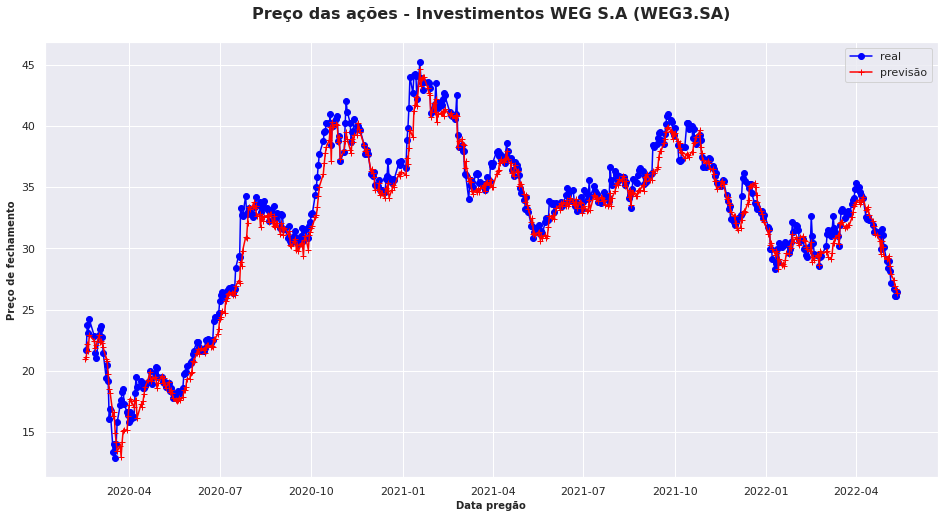

In [209]:
# gráfico dos dados reais e preditos
plt.figure(figsize=(16,8))

plt.title('Preço das ações - Investimentos WEG S.A (WEG3.SA)\n', 
          {'fontsize': 16,'fontweight': 'bold'})

plt.plot(df['real'], label='real', color='blue', marker='o')
plt.plot(df['previsao'], label='previsão', color='red', marker='+')

plt.xlabel('Data pregão', {'fontsize': 10,'fontweight': 'bold'})
plt.ylabel('Preço de fechamento', {'fontsize': 10,'fontweight': 'bold'})
plt.legend();

In [210]:
# criando uma cópia do dataframe e instanciando no objeto "df2"
df2 = df.copy()
df2.head(20)

,real,previsao
Date,,
2020-02-17,NaN,20.9982
2020-02-18,21.7445,21.1323
2020-02-19,23.7486,22.2022
2020-02-20,23.1017,21.6430
2020-02-21,24.2254,22.9162
2020-02-26,22.8576,22.4684
2020-02-27,21.4616,21.8677
2020-02-28,21.0614,22.0979
2020-03-02,22.9357,22.9379


In [211]:
# resetando o índice
df2.reset_index(inplace=True)
df2

,Date,real,previsao
0,2020-02-17,NaN,20.9982
1,2020-02-18,21.7445,21.1323
2,2020-02-19,23.7486,22.2022
3,2020-02-20,23.1017,21.6430
4,2020-02-21,24.2254,22.9162
...,...,...,...
548,2022-05-06,27.1500,27.9014
549,2022-05-09,26.6600,27.4153
550,2022-05-10,26.1200,26.9661
551,2022-05-11,26.1000,26.7024


In [212]:
# instanciando o recorte de tempo no df3
df3 = df2.loc['2021':] # de 2021 em diante
df3

,Date,real,previsao
203,2020-12-10,34.7986,34.5231
204,2020-12-11,34.7986,34.4979
205,2020-12-14,34.5781,34.1222
206,2020-12-15,35.6563,34.9210
207,2020-12-16,35.9259,34.6909
...,...,...,...
548,2022-05-06,27.1500,27.9014
549,2022-05-09,26.6600,27.4153
550,2022-05-10,26.1200,26.9661
551,2022-05-11,26.1000,26.7024


In [213]:
# visualizando o tipo de dados dos atributos
df3.dtypes

Date        datetime64[ns]
real               float64
previsao           float64
dtype: object

In [214]:
# resetando o índice
df3 = df3.set_index(pd.DatetimeIndex(
    df3['Date'].values
))

# visualizando
df3.head()

,Date,real,previsao
2020-12-10,2020-12-10,34.7986,34.5231
2020-12-11,2020-12-11,34.7986,34.4979
2020-12-14,2020-12-14,34.5781,34.1222
2020-12-15,2020-12-15,35.6563,34.9210
2020-12-16,2020-12-16,35.9259,34.6909


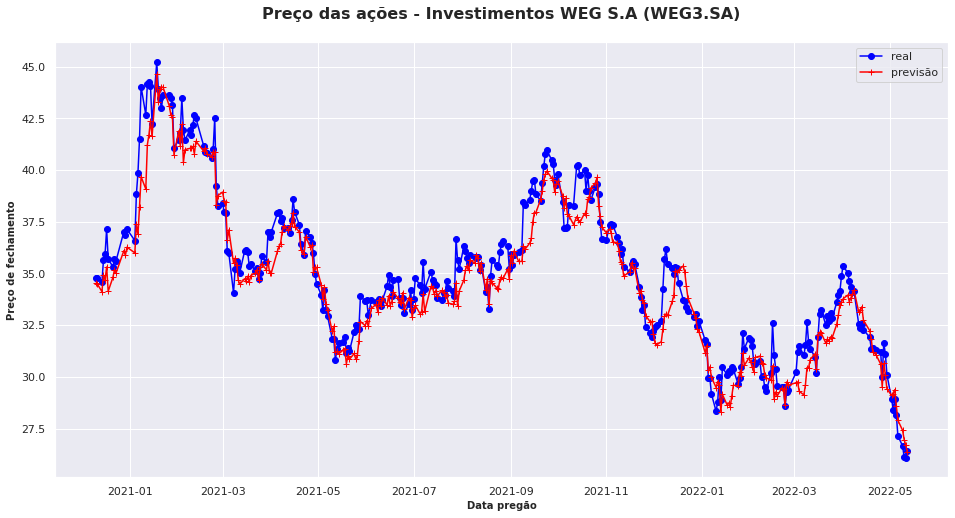

In [215]:
# plotando o gráfico do recorte da série temporal
plt.figure(figsize=(16,8))

plt.title('Preço das ações - Investimentos WEG S.A (WEG3.SA)\n', 
          {'fontsize': 16,'fontweight': 'bold'})

plt.plot(df3['real'], label='real', color='blue', marker='o')
plt.plot(df3['previsao'], label='previsão', color='red', marker='+')

plt.xlabel('Data pregão', {'fontsize': 10,'fontweight': 'bold'})
plt.ylabel('Preço de fechamento', {'fontsize': 10,'fontweight': 'bold'})
plt.legend();

In [216]:
# aplicando a função para plotar gráfico interativo do objeto "df3"
interactive_plot(df3, 'Preço das ações - Investimentos WEG S.A (WEG3.SA): Adj Close')